# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Benjamin Escobar Jaramillo

Identificación: CC 1001228411

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [34]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

### TODA LA SECCIÓN INICIAL DE RIDDER NO TUVO ALTERACIONES
### Unicamente una mejor conclusion de la gràfica final
---
### EN EL SEGUNDO PUNTO SI HUBO CAMBIOS

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [2]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.


def ridder(f,a,b,tol,maxiter):#Una funcion clasica, recibe una funcion, dos puntos,latolerancia y el maximo de iteraciones

#Devuelve dos valore: La raiz, las iteraciones

  for i in range(1,maxiter+1):#hace un numero de maxiter iteraciones

    if f(a)*f(b)>0:
      return print(f"f({a})*f({b}) tienen ambos el mismo signo; seleccione otros puntos")

    m=(a+b)/2 #calculamos el punto medio

    fa=f(a)
    fb=f(b)             #Nombramos nuestras funciones de interes
    fm=f(m)

    s=((fm**2)-(fa*fb))**(1/2)
    if s==0:
      return print("La raiz no puede implementarse")

    x= m + (((m-a)*fm)/(s))* np.sign(fa-fb)
    fx=f(x)

    if abs(fx)<tol:
      return x,i

    if fx*fm<0:
      a=x
      b=m
      continue

    elif fa*fx<0:
      b=x
      continue

    elif fb*fx<0:
      a=x

In [8]:
f=lambda x: x**2 -4
ridder(f,0,8,1e-16,100)         #Probemos rapidamente que funciona el señor ridder!

(np.float64(2.0), 7)

[Text(0, 0.5, '$y=cos(x)-x$'), Text(0.5, 0, '$x$')]

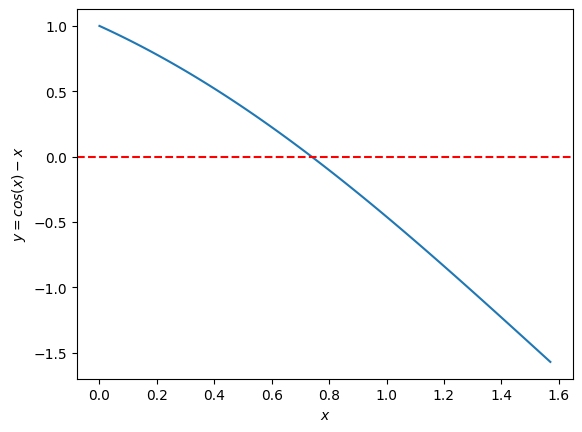

In [9]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.
f=lambda x: np.cos(x)-x
ejex=np.linspace(0,np.pi/2,100)
ejey=f(ejex)
fig,ax=plt.subplots()
ax.plot(ejex,ejey)
ax.axhline(0,color="red",linestyle="--")
ax.set(ylabel="$y=cos(x)-x$",
xlabel="$x$")

In [11]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.
data=pd.DataFrame({"x":ejex,"f(x)":ejey})# Aca podremos observar alrededor de que valores f(x)=0!
data

,x,f(x)
0,0.000000,1.000000
1,0.015867,0.984007
2,0.031733,0.967763
3,0.047600,0.951267
4,0.063467,0.934520
...,...,...
95,1.507330,-1.443906
96,1.523196,-1.475615
97,1.539063,-1.507335
98,1.554930,-1.539064


In [12]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.
datafiltro=data[(data["f(x)"]<0.1) & (data["f(x)"]>-0.1)]
datafiltro #Filtramos!!!

,x,f(x)
43,0.682265,0.093881
44,0.698132,0.067913
45,0.713998,0.041751
46,0.729865,0.015399
47,0.745732,-0.011140
48,0.761598,-0.037864
49,0.777465,-0.064771
50,0.793331,-0.091857


In [13]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.

tolerancia=1e-8 #Definimos una tolerancia estandar(similar a las default de newton y bisect)
print(ridder(f,0.6,0.9,tol =tolerancia,maxiter=100))
print(bisect(f,0.6,0.9))           #Newton con dos puntos es secante
print(newton(f,x0=0.6,x1=0.9)) #Nada mal, para compararlas, hagamos que nuestra funcion solo nos saque el valor, y no las iteraciones

(np.float64(0.7390851330936086), 2)
0.7390851332147576
0.7390851332151607


In [ ]:
def ridder2(f,a,b,tol,maxiter): #lo mismo, sin devolver iteraciones


  for i in range(1,maxiter+1):#hace un numero de maxiter iteraciones

    if f(a)*f(b)>0:
      return print(f"f({a})*f({b}) tienen ambos el mismo signo; seleccione otros puntos")

    m=(a+b)/2

    fa=f(a)
    fb=f(b)
    fm=f(m)

    s=((fm**2)-(fa*fb))**(1/2)
    if s==0:
      return print("La raiz no puede implementarse")

    x= m + (((m-a)*fm)/(s))* np.sign(fa-fb)
    fx=f(x)

    if abs(fx)<tol:
      return x

    if fx*fm<0:
      a=x
      b=m
      continue

    elif fa*fx<0:
      b=x
      continue

    elif fb*fx<0:
      a=x

In [ ]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.
diferencianewt=abs(ridder2(f,0.6,0.9,tol =tolerancia,maxiter=100)-newton(f,x0=0.6,x1=0.8))
diferencianewt #Muy similares!!

np.float64(1.215521017172705e-10)

In [ ]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.
diferenciabisec=abs(ridder2(f,0.6,0.9,tol =tolerancia,maxiter=100)-bisect(f,0.6,0.9))
diferenciabisec #tambien son demasiado cercanos!

np.float64(1.211489797370291e-10)

In [ ]:
#ESTA SECCIÓN DE CODIGO NO TUVO ALTERACIONES.
def ridderiter(f,a,b,tol,maxiter): #lo mismo, SOLO DEVUELVE ITERACIONES


  for i in range(1,maxiter+1):#hace un numero de maxiter iteraciones

    if f(a)*f(b)>0:
      return print(f"f({a})*f({b}) tienen ambos el mismo signo; seleccione otros puntos")

    m=(a+b)/2

    fa=f(a)
    fb=f(b)
    fm=f(m)

    s=((fm**2)-(fa*fb))**(1/2)
    if s==0:
      return print("La raiz no puede implementarse")

    x= m + (((m-a)*fm)/(s))* np.sign(fa-fb)
    fx=f(x)

    if abs(fx)<tol:
      return i

    if fx*fm<0:
      a=x
      b=m
      continue

    elif fa*fx<0:
      b=x
      continue

    elif fb*fx<0:
      a=x

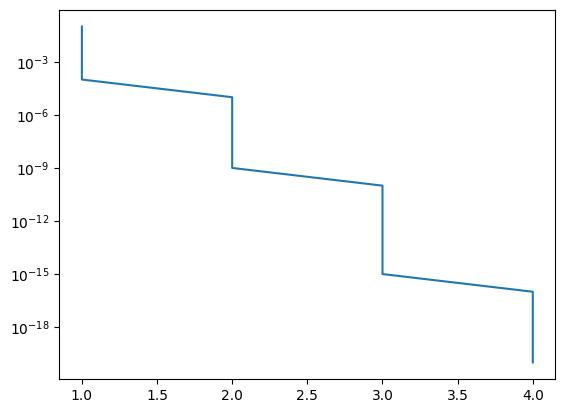

In [ ]:
#Una conclusión mas precisa; Ademas de que esta función converge con velocidad,tambien podemos observar que no es lineal
#Lo que ademas, implica su velocidad!


tol = np.logspace(-1, -20, 20)
iter=[]
for i in tol:
  iter.append(ridderiter(f,0.6,0.9,i,100))

plt.semilogy(iter, tol)          #Wow,que curioso!! converge con una velocidad loquísima!!

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





In [57]:
def df(teta1):     #Algo realmente sencillo, solo le ingresa theta1, y devuelve la derivada del angulo de desviación total
  A=np.deg2rad(60)
  n=1.52
  tetar=np.arcsin((np.sin(teta1))/n)
  return 1 - (np.cos(teta1)*np.cos(A-tetar))/(np.cos(tetar)*(1-(n**2)*(np.sin(A-tetar))**2)**(1/2))

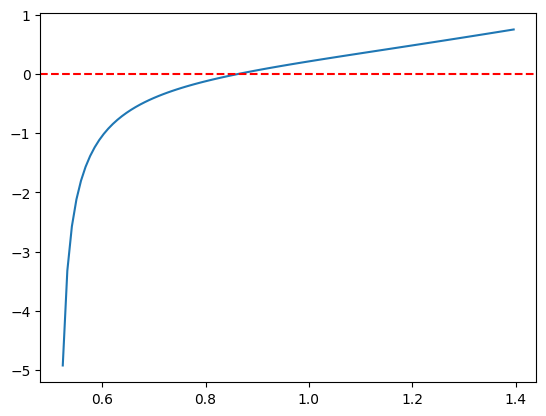

In [58]:
a=np.deg2rad(30)
b=np.deg2rad(80)

ejeh=np.linspace(a,b,100)
ejev=df(ejeh)

fig,ax=plt.subplots()
ax.plot(ejeh,ejev)
ax.axhline(0,color="red",linestyle="--")

In [59]:
#Como podemos observar, a ojimetro, el angulo debe estar entre 0.8 y 1 radian...!!!
#Entonces elangulo minimo es cuando la derivada es =0!! Yay!

newton(df,x0=0.8) #newton sin derivada

np.float64(0.8633131150155223)

In [60]:
newton(df,x0=0.8,x1=1)        #Y metodo de la secante!! perfecto

np.float64(0.8633131150155536)

### ACA HAY UN BREVE CAMBIO

In [83]:
# Esto es lo que teniamos ANTERIORMENTE!!

def funcion(tetar):
  A=np.deg2rad(60)
  n=1.52
  return np.sin(A -tetar) - (1/n)

angulocritico=bisect(funcion,-1,2)


A=np.deg2rad(60)
n=1.52
fx=np.sin(A-angulocritico)

print(fx,1/n)     #Efectivamente! La funcion es igual a 1/n

0.657894736841697 0.6578947368421053


In [86]:
#lo cual fue totalmente exitoso, Encontramos el angulo crítico! Ahora bien:
#Si lo solicitado era el angulo tetai, asociado al angulo de incidencia, solo basta con hacer lo siguiente:


def funcion2(tetai): #En este caso, la funcion lo que recibe es tetai, y expresamos tetar en terminos de tetai
  A=np.deg2rad(60)
  n=1.52
  tetar=np.arcsin((np.sin(tetai))/n) #Aca incluimos la forma de theta1 asociado al angulo tetar. (el angulo crìtico que buscamos!)

  return np.sin(A -tetar) - (1/n)

In [85]:
tetai=bisect(funcion2,0,2)   #Y aqui tenemos el tetai, asocsiado al angulo crìtico mencionado anteriormente!
tetai

0.5136536662193976

In [84]:
#Y ahora, solo resta comparar, solo para confirmar.
angulocritcocontetai=np.arcsin((np.sin(tetai))/n)
print(angulocritico,angulocritcocontetai)  #Efectivamente, hemos hallado, tanto tetar, como tetai, en su fomra critica.

0.32917764179865117 0.329177641797879
